# Seaborn

In contrast to ggplot, seaborn abstracts commonly used plots in functions that can be customized with arguments. In principle, seaborn should give you most of the functionality that ggplot gives you.

We import seaborn under its common abbreviation sns. With sns.set we can change the styling and behavior of the plots. Calling it without arguments just activates the defaults. One strenght of seaborn is its very nice styling.

In [13]:
!pip install seaborn > /dev/null

In [24]:
import seaborn as sns
import pandas as pd

sns.set()

Let's reset our dataset to its original form.

In [9]:
!pip install vega_datasets > /dev/null

import vega_datasets

In [10]:
cars = vega_datasets.data.cars()
cars = cars.fillna(cars.median(numeric_only=True))
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


We can now make a scatterplot matrix of all numeric variables with a single function call.

In [ ]:
sns.pairplot(cars)

Seaborn also has the idea of aesthetic mappings. However, they are realized with keyword arguments that you pass to the functions and not with a separate aes object.

In [ ]:
sns.pairplot(cars, hue='Origin')

Just imagine the code you would need to create this plot in matplotlib.

## Exploring a single variable

<Axes: xlabel='Acceleration', ylabel='Density'>

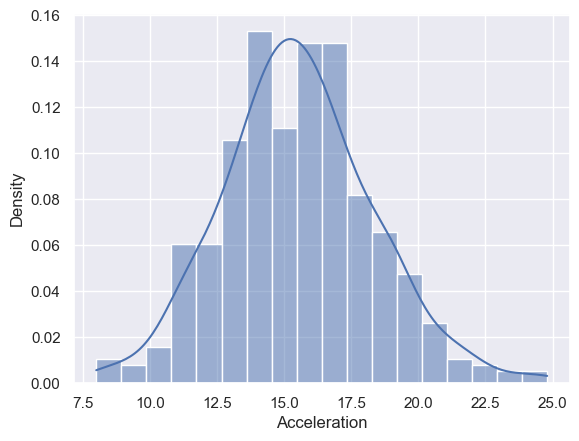

In [14]:
sns.histplot(x=cars['Acceleration'], stat='density', kde=True) # kde: kernel density estimate

<Axes: xlabel='Acceleration'>

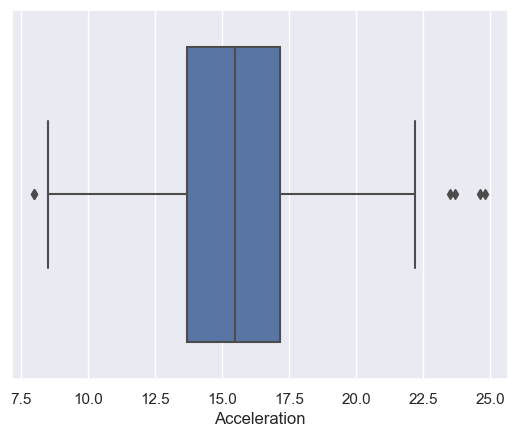

In [18]:
# alternatibely specify the dataframe as data and only use column names
sns.boxplot(x='Acceleration', data=cars)

## Exploring the relation of one continuous and one categorical variable

<Axes: xlabel='Origin', ylabel='Acceleration'>

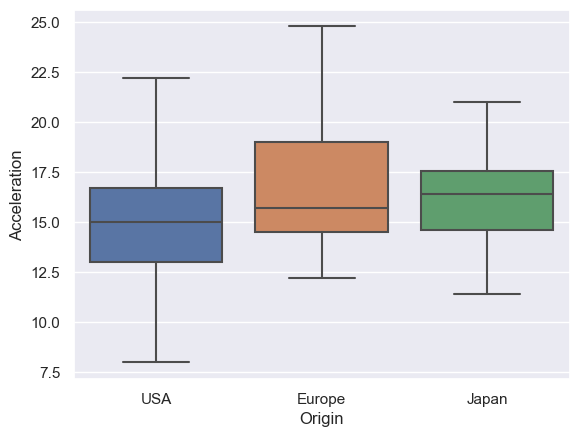

In [19]:
sns.boxplot(x='Origin', y='Acceleration', data=cars)

A nice alternative to jitter that is right now not included in Python's ggplot is the swarmplot. It also plots the original datapoints, but stacks similar datapoints side by side. This way we can get an impression of both data frequency and density.

<Axes: xlabel='Origin', ylabel='Acceleration'>

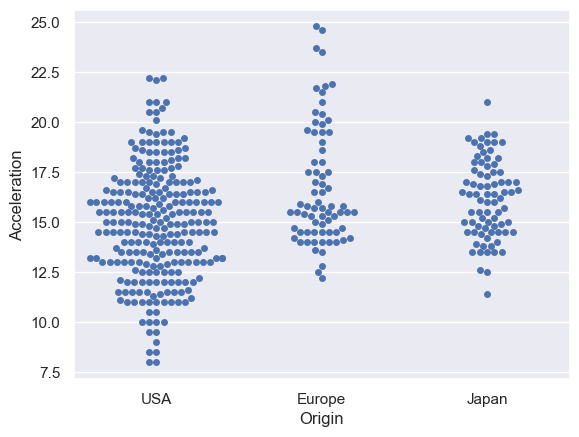

In [20]:
sns.swarmplot(x='Origin', y='Acceleration', data=cars)

Multiple plots can be combined by calling function after another. This is not as convenient as in ggplot, as the aesthetic mapping and the data binding has to be specified again.

<Axes: xlabel='Origin', ylabel='Acceleration'>

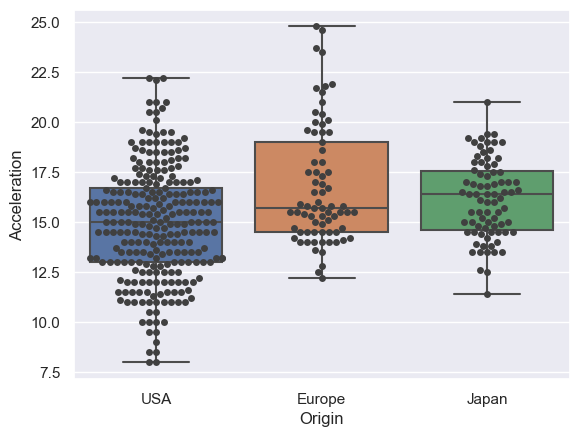

In [21]:
sns.boxplot(x='Origin', y='Acceleration', data=cars)
sns.swarmplot(x='Origin', y='Acceleration', color='0.25', data=cars)

<Axes: xlabel='Origin', ylabel='Acceleration'>

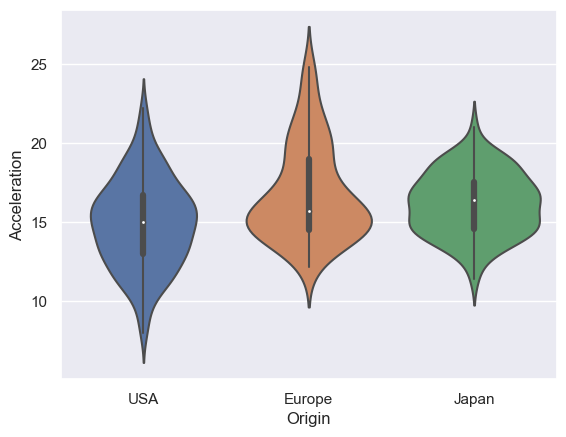

In [22]:
sns.violinplot(y='Acceleration', x='Origin', data=cars)

Let's create a binary variable, to demonstrate a nice twist for vioinplots.

In [26]:
cars['age'] = pd.cut(cars['Year'], bins=2, labels=['old', 'young'])

Using split=True each violing will show a different density, determined by the binary variable.

<Axes: xlabel='Origin', ylabel='Acceleration'>

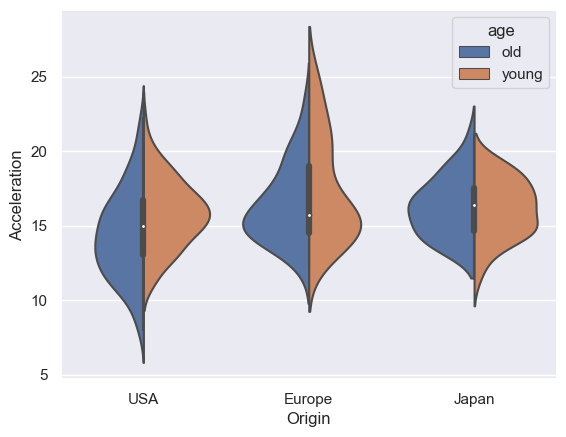

In [27]:
sns.violinplot(y='Acceleration', x='Origin', hue='age', split=True, data=cars)

## Exploring the relation of two continuous variables

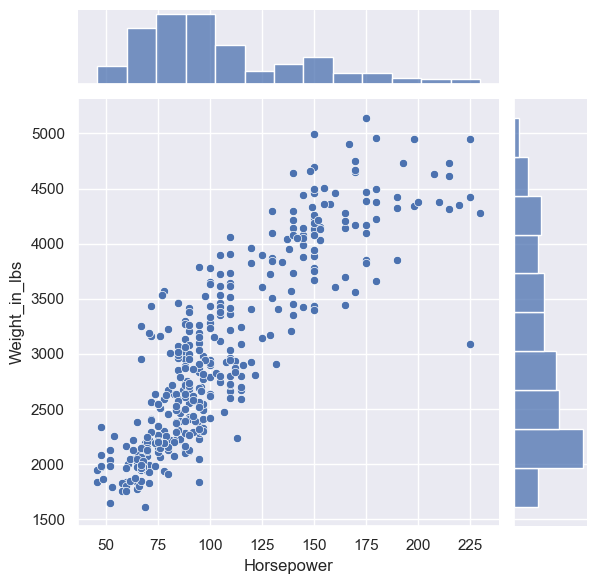

In [28]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', data=cars)

A "hexbin" plot is a kind of two dimensional histogram. Another way to avoid overplotting...

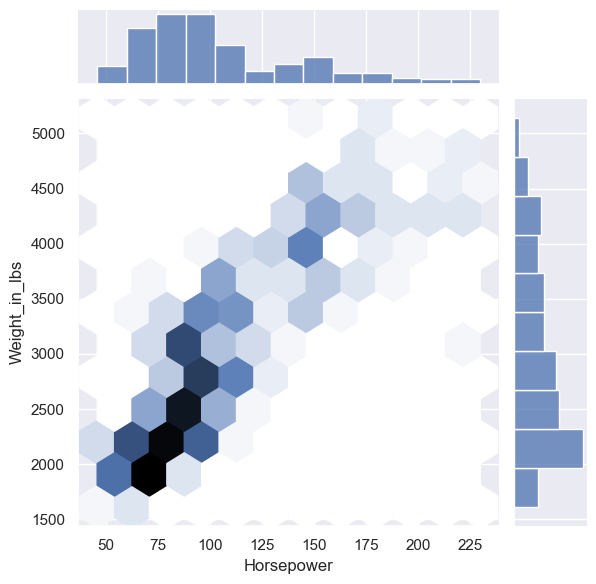

In [29]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', kind='hex', data=cars)

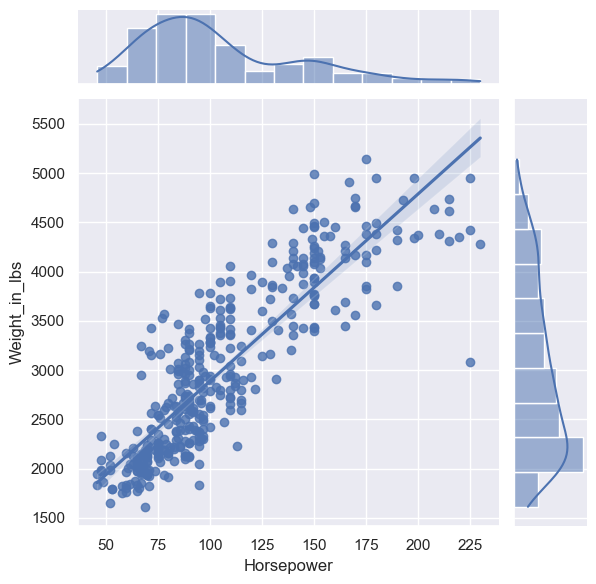

In [30]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', kind='reg', data=cars)

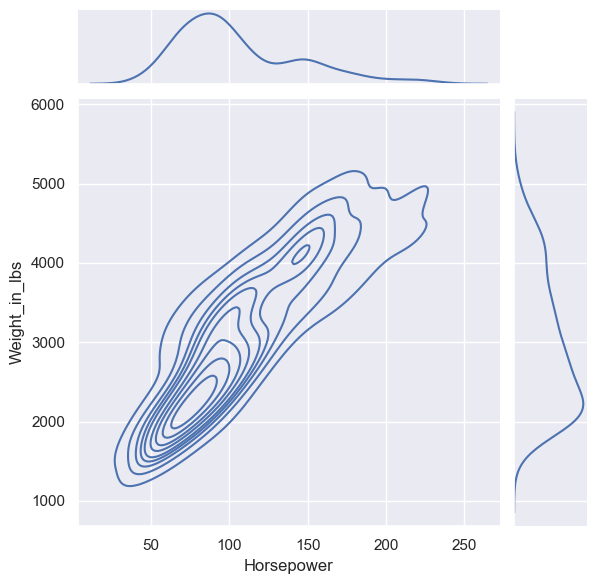

In [32]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', kind='kde', data=cars)

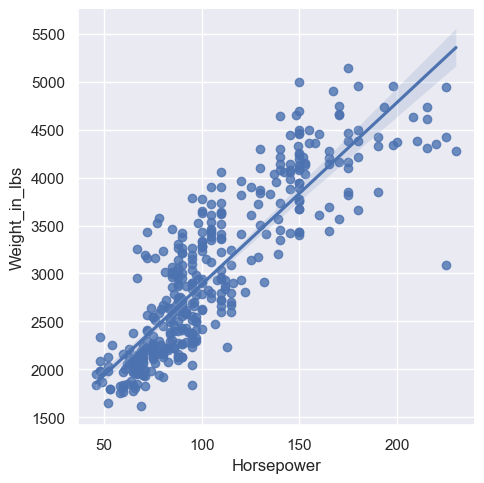

In [33]:
sns.lmplot(x='Horsepower', y='Weight_in_lbs', data=cars)

Many types of plots support faceting via the col or row argument.

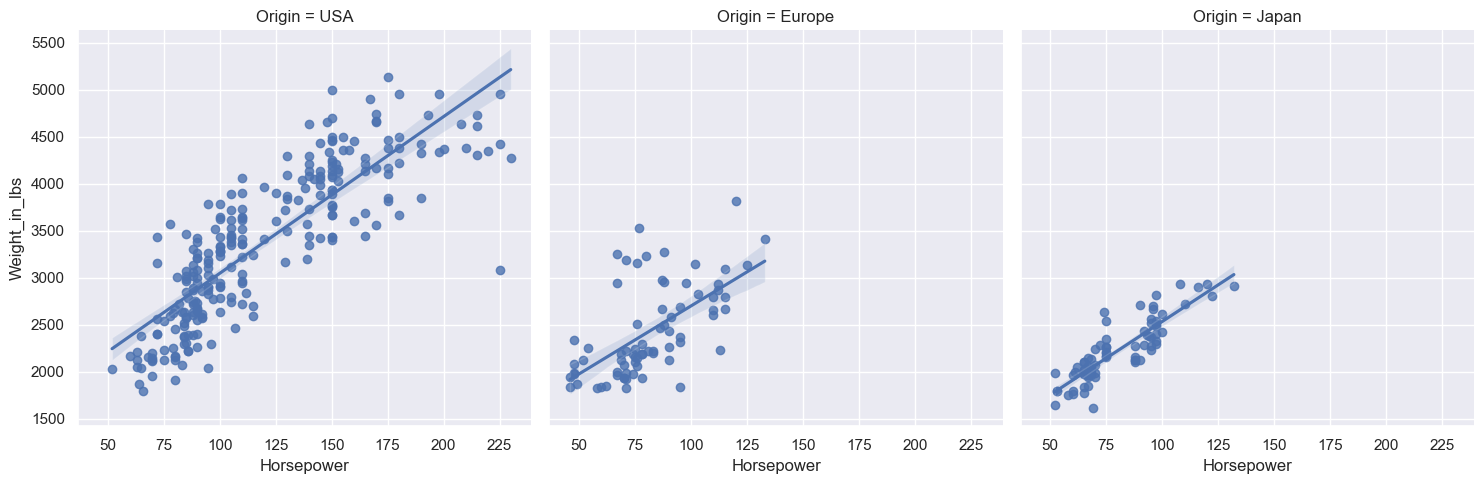

In [34]:
sns.lmplot(x='Horsepower', y='Weight_in_lbs', col='Origin', data=cars)